<a href="https://colab.research.google.com/github/rizzaesh/machine-learning-sklearn/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Linear Models

In [120]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

In [41]:
reg = linear_model.LinearRegression() #define the model
reg.fit([[0, 0],[1, 1],[2, 2]], [0, 1, 2]) #fit the model
reg.coef_ #this is the W where we say Y = W*X + b

array([0.5, 0.5])

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix 
 only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

In [36]:
reg = linear_model.Ridge(alpha=0.9)
reg.fit([[0,0],[1,1],[2,2]],[0,0.1,.2])

reg.coef_,reg.intercept_ # first the W and the second is the b

(array([0.04081633, 0.04081633]), 0.018367346938775522)

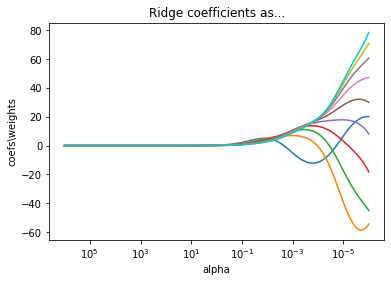

In [80]:
from numpy.core.fromnumeric import size
#example of Ridge
# what is the X ?
X = 0.1 / (np.arange(1, 11) + np.arange(0, 10)[:,np.newaxis])
y = np.ones(10)
#--------------------------------------
n_alphas = 100
alphas = np.logspace(-6, 6, n_alphas) # find number between 1**a and 1**b in log space
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#---------------------------------------
ax = plt.gca()
# plt.figure(figsize = (10,10))
############ OPs
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis

plt.xlabel("alpha")
plt.ylabel("coefs\weights")
plt.title("Ridge coefficients as...")
plt.axis("tight")
plt.show()

In [90]:
# regularization with Lasso --> ridge/n_sample
lasso = linear_model.Lasso(alpha = .1)
lasso.fit([[0,0],[1,1],[2,2]],[0,1,2])
reg.predict([[0.2,1]])

array([0.6])

Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


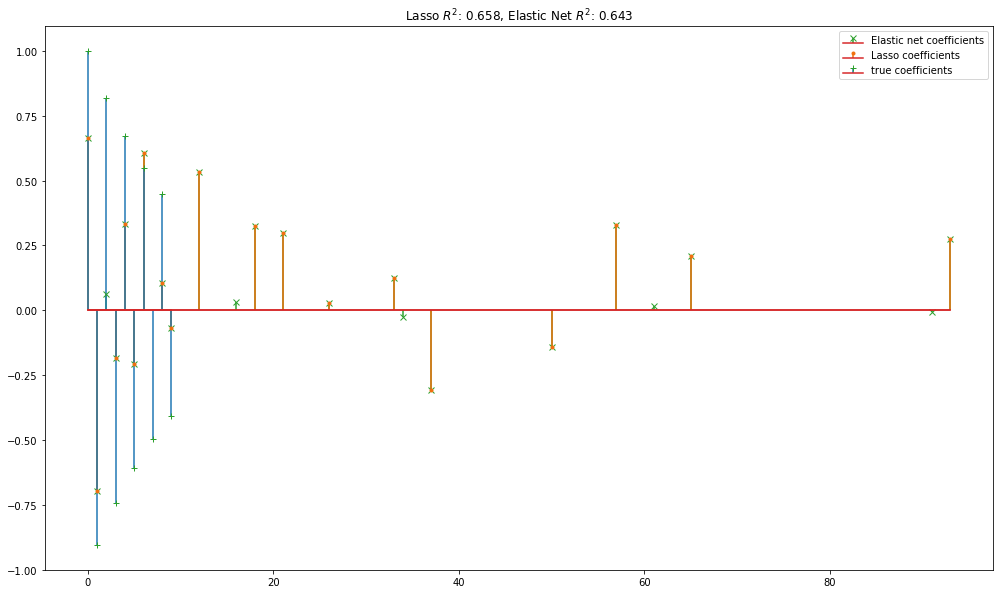

In [171]:
import sklearn
#lasso example
np.random.seed(42)

n_sample, n_feature = 50, 100
X = np.random.randn(n_sample, n_feature)

idx = np.arange(n_feature)
coef = (-1) ** idx * np.exp(-idx / 10) #we defie W

coef[10:] = 0 #sparse the matrix

y = np.dot(X,coef)
# add noise
y += 0.01 * np.random.normal(size = n_sample)

n_sample = X.shape[0]
X_train, y_train = X[: n_sample //2],y[: n_sample //2] #from 0 to a
X_test, y_test = X[n_sample //2 :],y[n_sample //2 :] #from a+1 to -1


# lasso
alpha = 0.1
lasso = linear_model.Lasso(alpha = alpha)
y_pred_lasso = lasso.fit(X_train,y_train).predict(X_test)

r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# Elasticnet
enet = ElasticNet(alpha=alpha, l1_ratio = 0.7)
y_pred_enet = enet.fit(X_train,y_train).predict(X_test)
r2_score_enet = r2_score(y_test,y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

# plotting

plt.figure(figsize = (17,10))

m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")

m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    enet.coef_[lasso.coef_ != 0],
    markerfmt = '.',
    label = 'Lasso coefficients',
    use_line_collection = True,
)
plt.setp([m,s],color = "#f1700e")

plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label = "true coefficients",
    markerfmt = "+",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso,r2_score_enet)
)

plt.show()

# finally
# in this section we evaluate that the lasso and enet
# with different amount of alpha how can find the initional
# coef. so what we can see is that this models can hardly (50%)
# find the real Ws and the ys.